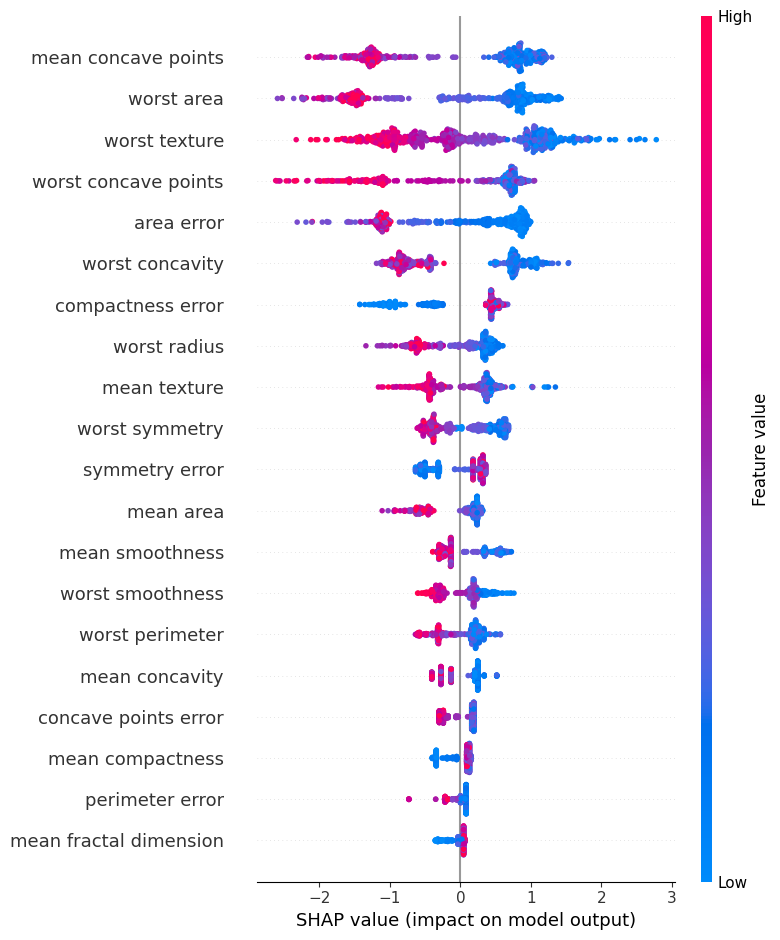

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import xgboost
import shap

# Load data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Train a random forest classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the outputs are DataFrames
X_train_df = pd.DataFrame(X_train, columns=cancer.feature_names)
X_test_df = pd.DataFrame(X_test, columns=cancer.feature_names)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

model = xgboost.XGBClassifier().fit(X_train_df, y_train_df)

# compute SHAP values
explainer = shap.Explainer(model, X_train_df)
shap_values = explainer(X)
shap.summary_plot(shap_values, X, feature_names=cancer.feature_names)
# shap.plots.beeswarm(shap_values)

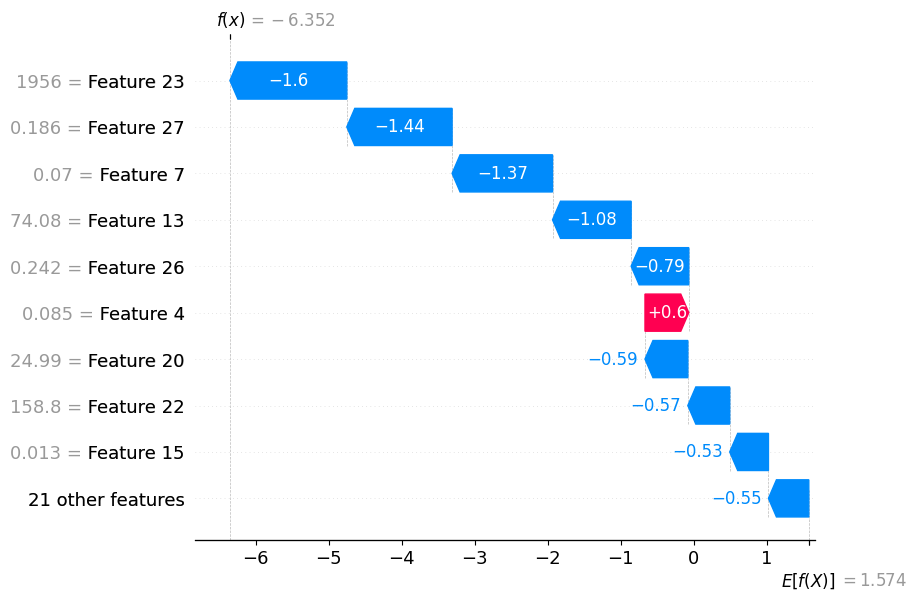

In [6]:
idx = 1
shap.plots.waterfall(shap_values[idx])

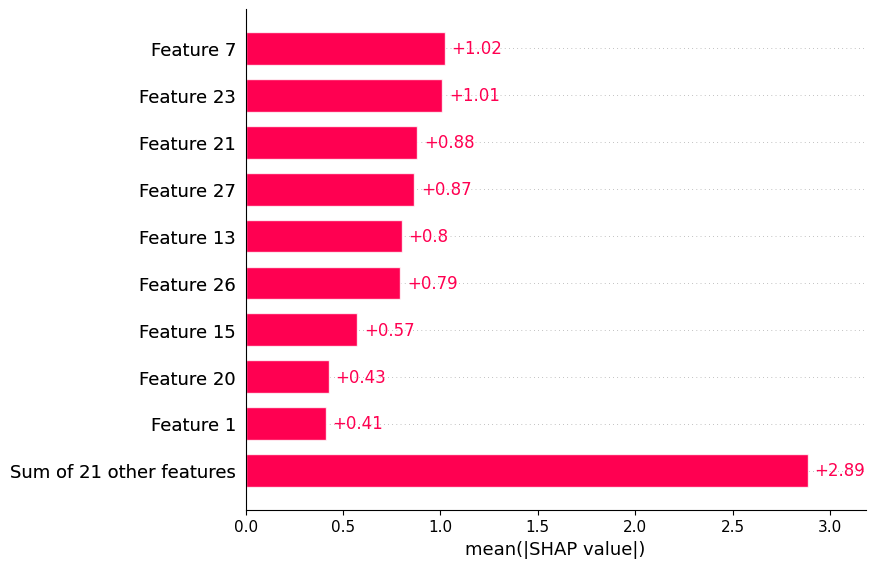

Features' Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [14]:
shap.plots.bar(shap_values.abs.mean(0))
print(f"Features' Names: {cancer.feature_names}")

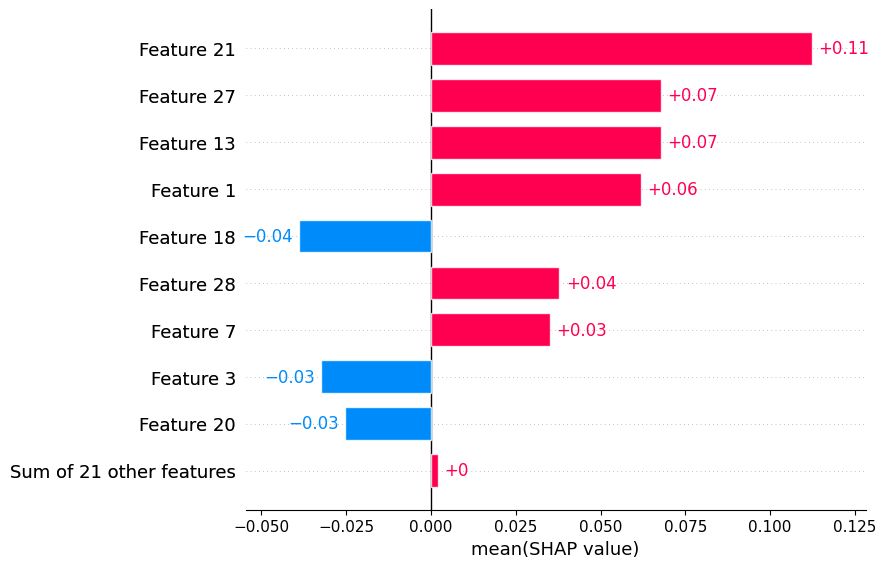

In [15]:
shap.plots.bar(shap_values.mean(0))

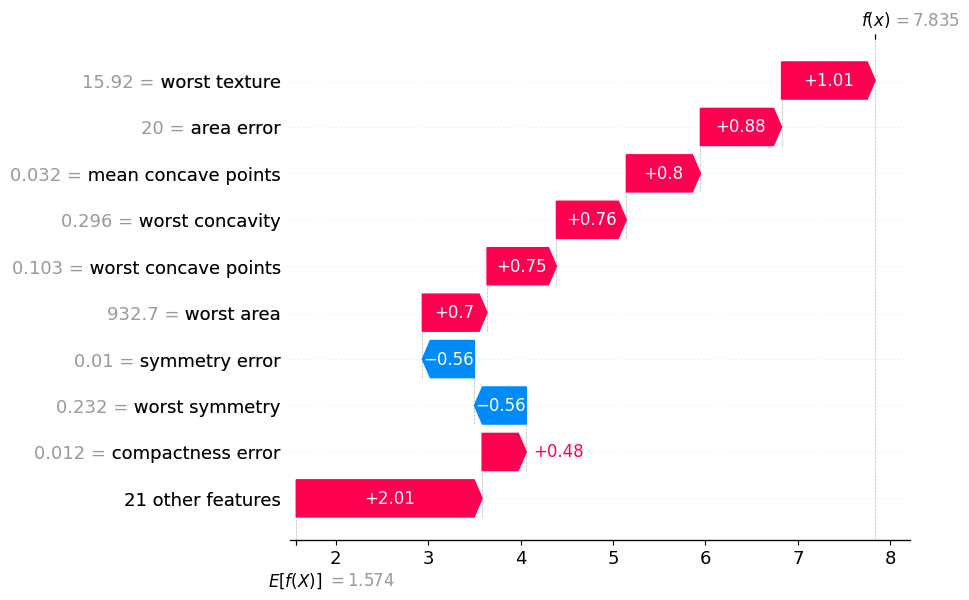

In [16]:
from shap import TreeExplainer, Explanation
from shap.plots import waterfall, bar
exp = Explanation(shap_values.values,
                  shap_values.base_values,
                  data=X_train,
                  feature_names=cancer.feature_names)
idx = 20
shap.plots.waterfall(exp[idx])